In [3]:
# ==========================================
# 1. IMPORTACIONES
# ==========================================
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# ==========================================
# 2. DESCARGA DE DATOS DEL D√ìLAR (USDCOP)
# ==========================================
# TRM = tasa representativa del mercado (USD vs peso colombiano)
# Usamos 'USDCOP=X' (Yahoo Finance)
data = yf.download("USDCOP=X", start="2015-01-01", end="2025-01-01")

# Verificamos que tenga datos v√°lidos
if data.empty:
    raise ValueError("No se pudieron obtener datos de USDCOP desde Yahoo Finance.")

# Tomaremos la columna 'Close' como la TRM diaria
trm = data['Close'].dropna().values

/tmp/ipykernel_1068257/398052758.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("USDCOP=X", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [8]:
# ==========================================
# 3. CONSTRUCCI√ìN DEL DATASET (5 entradas ‚Üí 1 salida a 7 d√≠as)
# ==========================================
X = []
Y = []
for i in range(len(trm) - 12):
    X.append(trm[i:i+5])
    Y.append(trm[i+12])

X = np.array(X)
Y = np.array(Y)

# ‚úÖ Verificar y corregir dimensiones
print("Shape original de X:", X.shape)
X = X.reshape(len(X), -1)  # Asegura que sea 2D
print("Shape corregido de X:", X.shape)

Shape original de X: (2596, 5, 1)
Shape corregido de X: (2596, 5)


In [9]:
# ==========================================
# 4. NORMALIZACI√ìN
# ==========================================
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_norm = scaler_X.fit_transform(X)
Y_norm = scaler_Y.fit_transform(Y.reshape(-1, 1)).ravel()

In [10]:
# ==========================================
# 5. CONSTRUCCI√ìN DEL MODELO MLP CON KERAS
# ==========================================
num_layers = int(input("Ingrese el n√∫mero de capas ocultas: "))
neuronas_por_capa = [
    int(input(f"Ingrese el n√∫mero de neuronas para la capa {i+1}: "))
    for i in range(num_layers)
]

model = keras.Sequential()
model.add(layers.Dense(neuronas_por_capa[0], activation='tanh', input_shape=(5,)))
for n in neuronas_por_capa[1:]:
    model.add(layers.Dense(n, activation='tanh'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/home/david/Documentos/estudios/2025-2 ITM/EII/venv-eii/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-27 01:24:04.779256: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
# ==========================================
# 6. ENTRENAMIENTO
# ==========================================
history = model.fit(X_norm, Y_norm, epochs=200, verbose=1)

Epoch 1/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 0.6468 - mae: 0.7609
Epoch 2/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0796 - mae: 0.2388
Epoch 3/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0142 - mae: 0.0964
Epoch 4/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.0124 - mae: 0.0929
Epoch 5/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0122 - mae: 0.0921
Epoch 6/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0120 - mae: 0.0913
Epoch 7/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0118 - mae: 0.0903
Epoch 8/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.0115 - mae: 0.0893
Epoch 9/200
82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [12]:
# ==========================================
# 7. PREDICCI√ìN SOBRE EL MISMO CONJUNTO (TEST INTERNO)
# ==========================================
Y_pred_norm = model.predict(X_norm)
Y_pred = scaler_Y.inverse_transform(Y_pred_norm)

82/82 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step


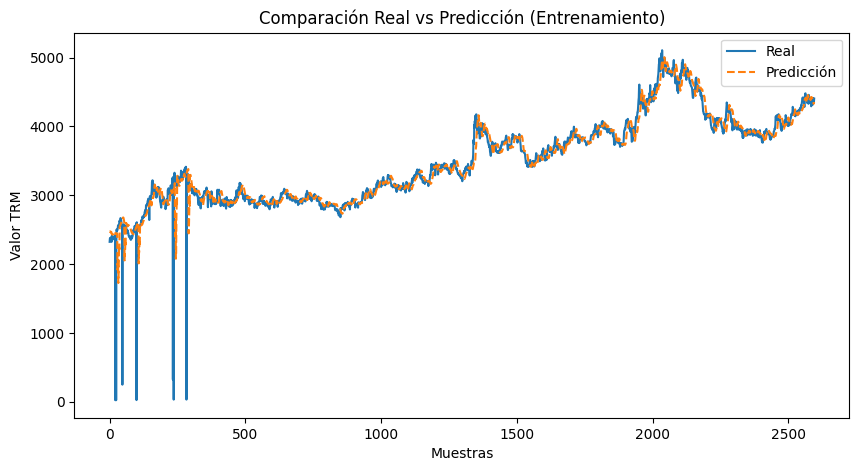

In [13]:
# Gr√°fico de comparaci√≥n
plt.figure(figsize=(10, 5))
plt.plot(Y, label="Real")
plt.plot(Y_pred, label="Predicci√≥n", linestyle='dashed')
plt.title("Comparaci√≥n Real vs Predicci√≥n (Entrenamiento)")
plt.xlabel("Muestras")
plt.ylabel("Valor TRM")
plt.legend()
plt.show()


==== Predicci√≥n personalizada a 7 d√≠as ====


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 81ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 68ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 72ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 92ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 73ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 73ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step


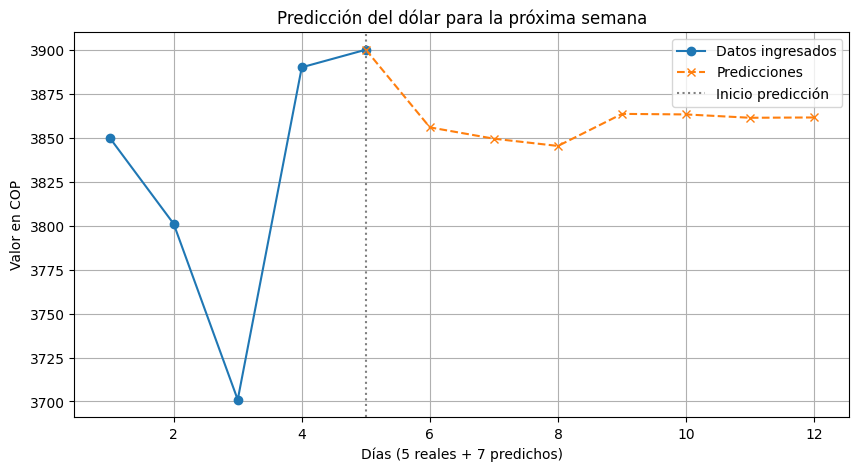


üìå Predicciones para los pr√≥ximos 7 d√≠as:
D√≠a futuro 1: $3,855.85 COP
D√≠a futuro 2: $3,849.40 COP
D√≠a futuro 3: $3,845.29 COP
D√≠a futuro 4: $3,863.52 COP
D√≠a futuro 5: $3,863.21 COP
D√≠a futuro 6: $3,861.31 COP
D√≠a futuro 7: $3,861.48 COP


In [15]:
# ==========================================
# 8. INTERFAZ PARA USUARIO (Predicci√≥n 7 d√≠as)
# ==========================================
print("\n==== Predicci√≥n personalizada a 7 d√≠as ====")
nuevo_x = []
for i in range(5):
    val = float(input(f"Ingrese el valor del d√≥lar para el d√≠a {i+1}: "))
    nuevo_x.append(val)

# Convertimos a formato adecuado
ventana_actual = np.array(nuevo_x, dtype=np.float32).reshape(1, -1)

# Guardamos los valores originales para graficar
valores_grafica = list(nuevo_x)

# Generamos las 7 predicciones encadenadas
for _ in range(7):
    # Normalizar la ventana de entrada
    ventana_norm = scaler_X.transform(ventana_actual)

    # Predecir 1 d√≠a
    pred_norm = model.predict(ventana_norm)
    pred_real = scaler_Y.inverse_transform(pred_norm)[0][0]

    # Agregar al gr√°fico
    valores_grafica.append(pred_real)

    # Preparar la siguiente ventana deslizante
    nueva_ventana = list(ventana_actual.flatten()[1:]) + [pred_real]
    ventana_actual = np.array(nueva_ventana, dtype=np.float32).reshape(1, -1)

# ==========================================
# 9. GR√ÅFICA: 5 valores ingresados + 7 predicciones
# ==========================================
import matplotlib.pyplot as plt

dias = list(range(1, 13))  # 5 d√≠as reales + 7 predichos

plt.figure(figsize=(10, 5))
plt.plot(dias[:5], valores_grafica[:5], marker='o', label="Datos ingresados")
plt.plot(dias[4:], valores_grafica[4:], marker='x', linestyle='--', label="Predicciones")
plt.axvline(x=5, color='gray', linestyle=':', label="Inicio predicci√≥n")

plt.title("Predicci√≥n del d√≥lar para la pr√≥xima semana")
plt.xlabel("D√≠as (5 reales + 7 predichos)")
plt.ylabel("Valor en COP")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tambi√©n los valores en consola
print("\nüìå Predicciones para los pr√≥ximos 7 d√≠as:")
for i, val in enumerate(valores_grafica[5:], start=1):
    print(f"D√≠a futuro {i}: ${val:,.2f} COP")
